## EDA on Haberman dataset

In [2]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load haberman.csv into pandas dataframe

hm=pd.read_csv("haberman.csv")

In [4]:
#data points and features

print(hm.shape)

(306, 4)


In [5]:
#columns in data set

print(hm.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [6]:
#(Q) How many data points for each class are present? 

hm["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [7]:
#mapping 1 to survived and 2 to dead

hm['status'] = hm['status'].map({1:'survived', 2:'dead'})

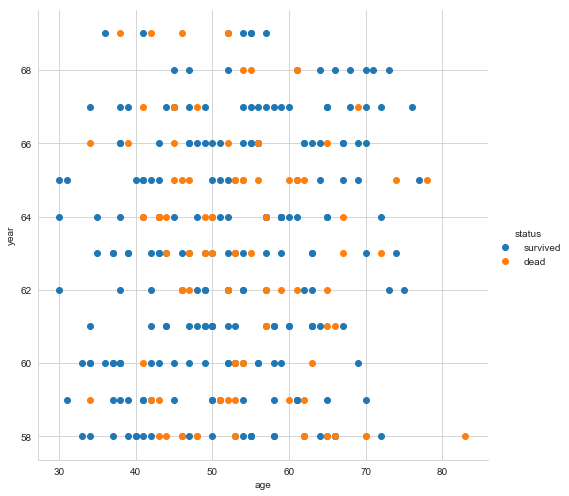

In [8]:
# 2-D Scatter Plot

sns.set_style("whitegrid");
sns.FacetGrid(hm,hue="status",height=7) \
   .map(plt.scatter,"age","year") \
   .add_legend();
plt.show()

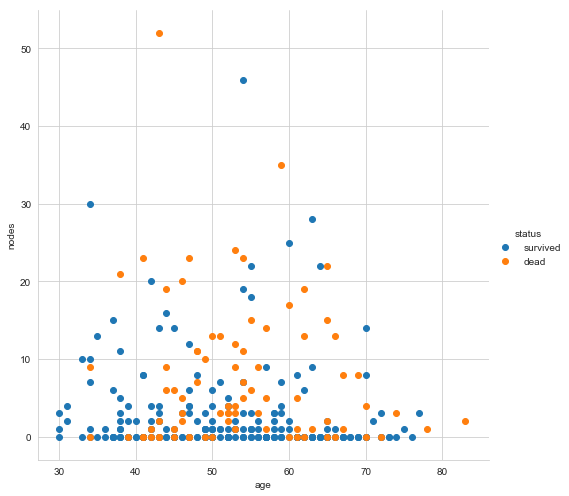

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(hm,hue="status",height=7) \
   .map(plt.scatter,"age","nodes") \
   .add_legend();
plt.show()

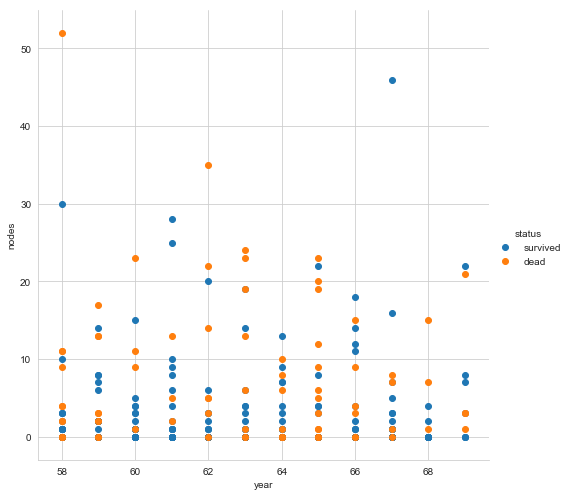

In [10]:
sns.set_style("whitegrid");
sns.FacetGrid(hm,hue="status",height=7) \
   .map(plt.scatter,"year","nodes") \
   .add_legend();
plt.show()

# **Observation(s):**

We need to do further analysis to understand the pattern to classify


# Pair-plot

C:\Users\Surya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


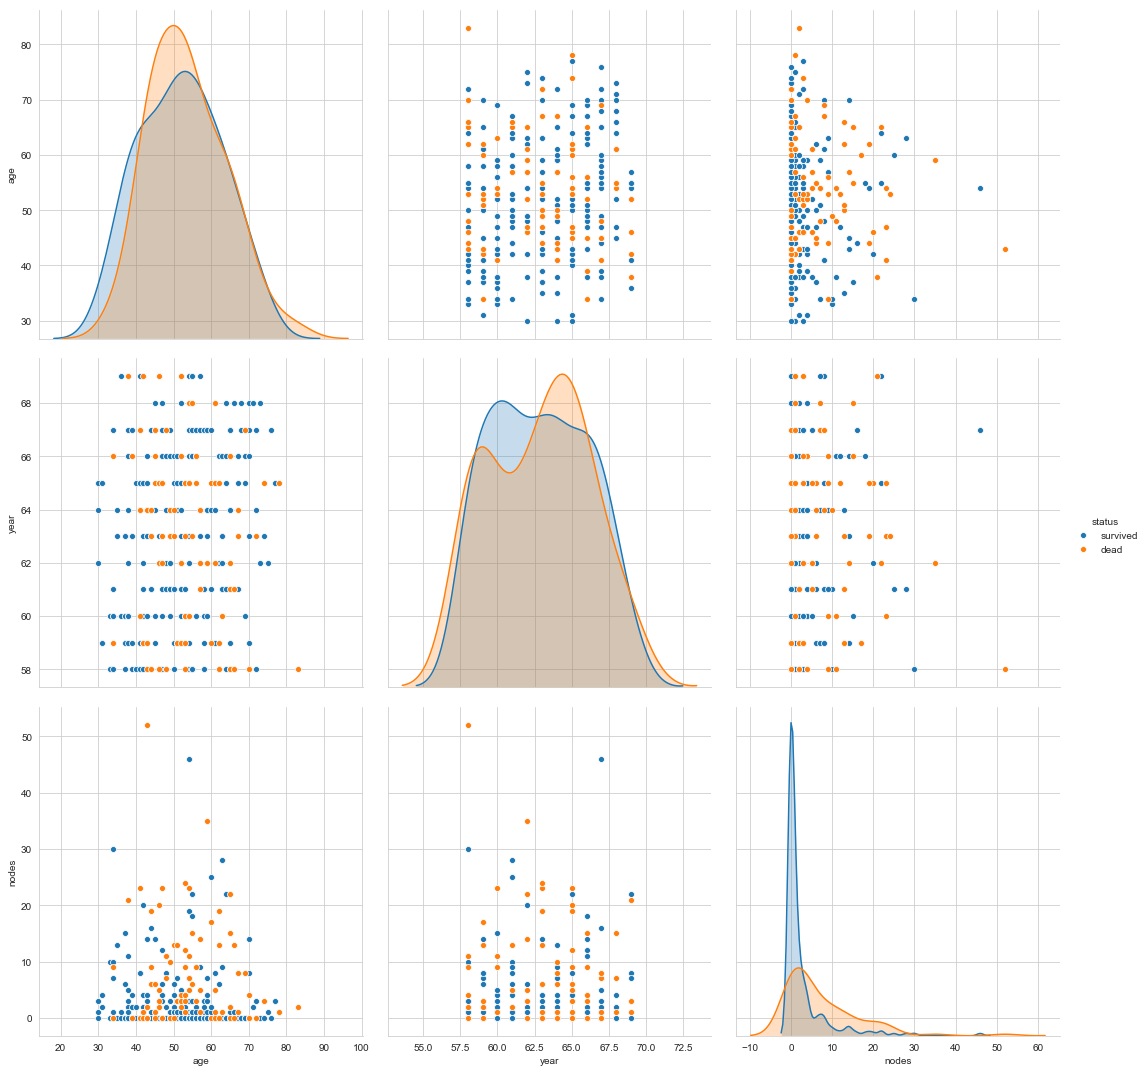

In [11]:
plt.close();
sns.set_style("whitegrid")
sns.pairplot(hm,hue="status",height=5);
plt.show()

# **Observation(s):**

We didnt get any clear picture,further analysis need to be done


## Histogram

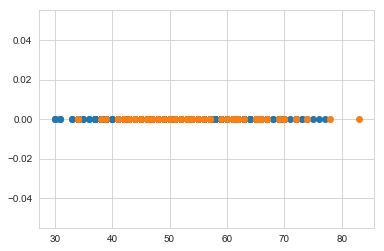

In [12]:
hm_survived=hm.loc[hm["status"]=="survived"]
hm_dead=hm.loc[hm["status"]=="dead"]

plt.plot(hm_survived["age"],np.zeros_like(hm_survived["age"]),'o')
plt.plot(hm_dead["age"],np.zeros_like(hm_dead["age"]),'o')

plt.show()

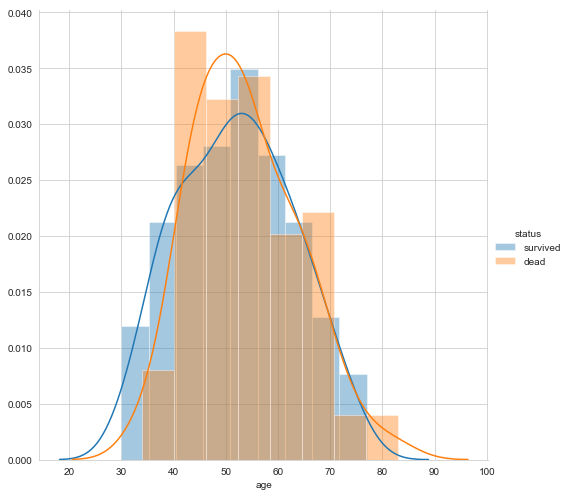

In [13]:
sns.FacetGrid(hm,hue="status",height=7) \
   .map(sns.distplot,"age") \
   .add_legend();
    
plt.show();

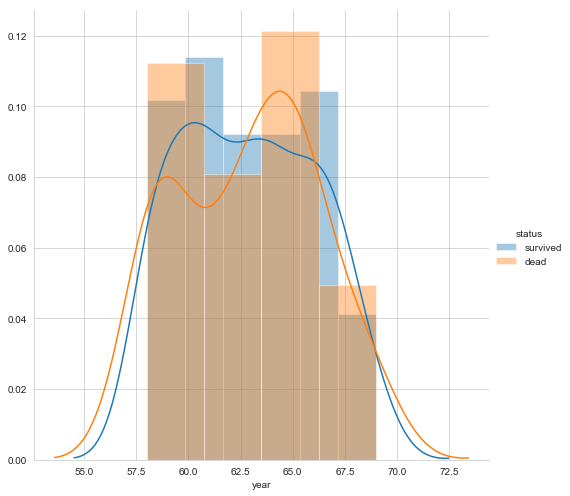

In [14]:
sns.FacetGrid(hm,hue="status",height=7) \
   .map(sns.distplot,"year") \
   .add_legend();
plt.show();

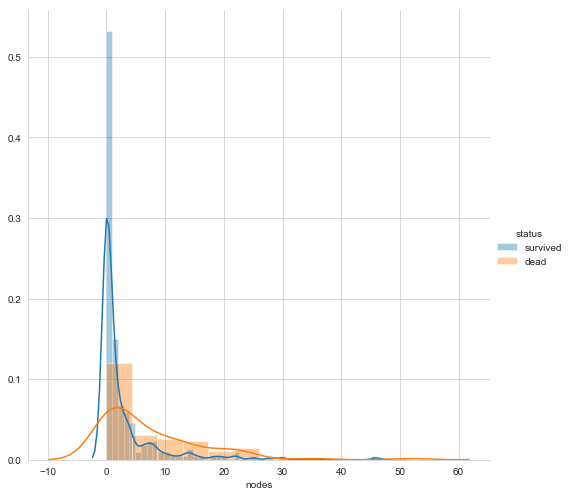

In [15]:
sns.FacetGrid(hm,hue="status",height=7) \
   .map(sns.distplot,"nodes") \
   .add_legend();
plt.show();

## Observation:
Nodes with points zero(0) are more likely to survive.

## CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


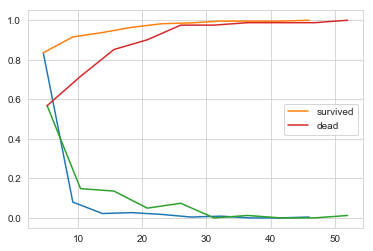

In [16]:
counts, bin_edges = np.histogram(hm_survived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf,label="survived")

counts, bin_edges = np.histogram(hm_dead['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf,label="dead")

#counts, bin_edges = np.histogram(hm_survived['age'], bins=20, 
                                 #density = True)
#pdf = counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf);

plt.legend();
plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


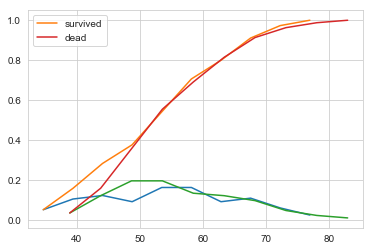

In [17]:
counts, bin_edges = np.histogram(hm_survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf,label="survived")

counts, bin_edges = np.histogram(hm_dead['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf,label="dead")

plt.legend();
plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


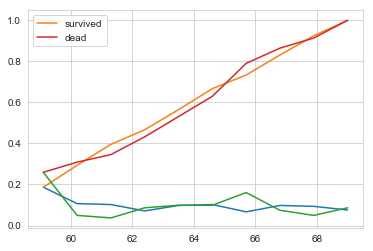

In [18]:
counts, bin_edges = np.histogram(hm_survived['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf,label="survived")

counts, bin_edges = np.histogram(hm_dead['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf,label="dead")

plt.legend();
plt.show();

# Observation:

If the node points are less than 45 they are survived

If the node points are less than 45 they are not survived


## Mean, Variance and Std-dev

In [19]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(hm_survived["nodes"]))
print(np.mean(hm_dead["nodes"]))

print("\nStd-dev:");
print(np.std(hm_survived["nodes"]))
print(np.std(hm_dead["nodes"]))


Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


## Median, Percentile, Quantile, IQR, MAD

In [20]:
#Median, Quantiles, Percentiles, IQR.
print("Median:")
print(np.median(hm_survived["nodes"]))
print(np.median(hm_dead["nodes"]))

print("\nQuantiles:");
print(np.percentile(hm_survived["nodes"],np.arange(0, 100, 25)))
print(np.percentile(hm_dead["nodes"],np.arange(0, 100, 25)))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(hm_survived["nodes"]))
print(robust.mad(hm_dead["nodes"]))

Median:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Median Absolute Deviation
0.0
5.930408874022408


## Box plot and Whiskers

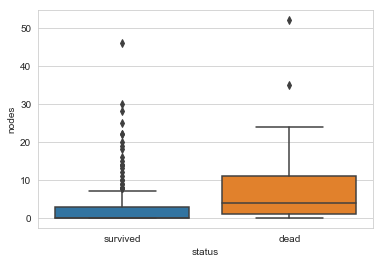

In [21]:
sns.boxplot(x='status',y='nodes', data=hm)
plt.show()

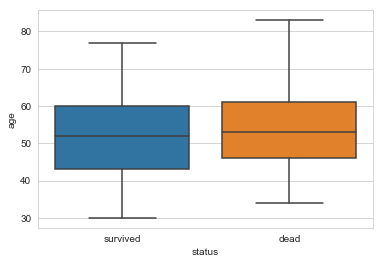

In [22]:
sns.boxplot(x='status',y='age', data=hm)
plt.show()

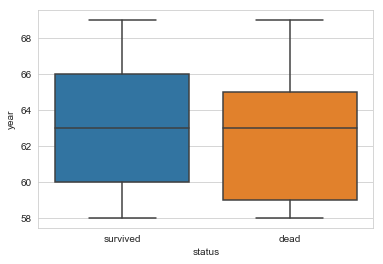

In [23]:
sns.boxplot(x='status',y='year', data=hm)
plt.show()

## Violin plots

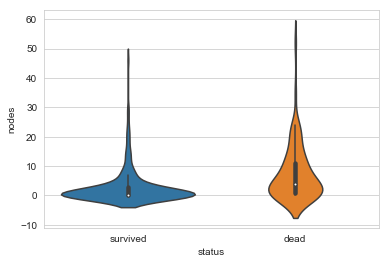

In [24]:
sns.violinplot(x="status", y="nodes", data=hm, height=15)
plt.show()

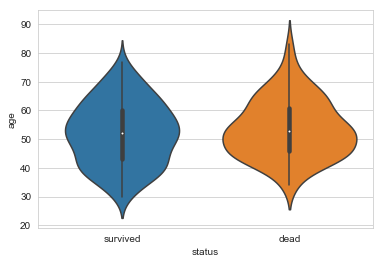

In [25]:
sns.violinplot(x="status", y="age", data=hm, height=15)
plt.show()

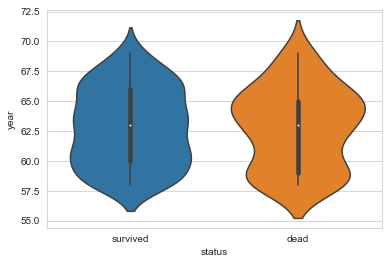

In [26]:
sns.violinplot(x="status", y="year", data=hm, height=15)
plt.show()

## Observation:

If the node points are between 0 to 5 they are more likely to survive

and the age of them is between 45 to 55